### Importing the Required Libraries and the Data

In [1]:
import numpy as np
import pandas as pd 
pd.set_option("display.max_columns", None)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
import pickle 

In [2]:
df = pd.read_csv("/Users/aloaskari/Desktop/Ironhack/Bootcamp/tech_challenge/clone/technical_challenge_DA/data/measurements.csv")

df

distance consume  speed temp_inside  temp_outside specials gas_type  AC  \
0         28       5     26        21,5            12      NaN      E10   0   
1         12     4,2     30        21,5            13      NaN      E10   0   
2       11,2     5,5     38        21,5            15      NaN      E10   0   
3       12,9     3,9     36        21,5            14      NaN      E10   0   
4       18,5     4,5     46        21,5            15      NaN      E10   0   
..       ...     ...    ...         ...           ...      ...      ...  ..   
383       16     3,7     39        24,5            18      NaN     SP98   0   
384     16,1     4,3     38          25            31       AC     SP98   1   
385       16     3,8     45          25            19      NaN     SP98   0   
386     15,4     4,6     42          25            31       AC     SP98   1   
387     14,7       5     25          25            30       AC     SP98   1   

     rain  sun refill liters refill gas  
0       0    0            45        E10  
1       0    0           NaN        NaN  
2       0    0           NaN        NaN  
3       0    0           NaN        NaN  
4       0    0           NaN        NaN  
..    ...  ...           ...        ...  
383     0    0           NaN        NaN  
384     0    0           NaN        NaN  
385     0    0           NaN        NaN  
386     0    0           NaN        NaN  
387     0    0           NaN        NaN  

[388 rows x 12 columns]

In [3]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [4]:
df.dtypes 

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [5]:
df.shape

(388, 12)

### Cleaning the Data

In [6]:
df['distance'] = df['distance'].str.replace(',', '.')
df['consume'] = df['consume'].str.replace(',', '.')
df['temp_inside'] = df['temp_inside'].str.replace(',', '.')
df['temp_outside'] = df['temp_outside'].astype(float)

In [7]:
df[['distance', 'consume', 'temp_inside']] = df[['distance', 'consume', 'temp_inside']].astype(float)

In [8]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [9]:
df = df.drop(['specials', 'refill liters', 'refill gas'], axis=1)

In [10]:
df

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
0        28.0      5.0     26         21.5          12.0      E10   0     0   
1        12.0      4.2     30         21.5          13.0      E10   0     0   
2        11.2      5.5     38         21.5          15.0      E10   0     0   
3        12.9      3.9     36         21.5          14.0      E10   0     0   
4        18.5      4.5     46         21.5          15.0      E10   0     0   
..        ...      ...    ...          ...           ...      ...  ..   ...   
383      16.0      3.7     39         24.5          18.0     SP98   0     0   
384      16.1      4.3     38         25.0          31.0     SP98   1     0   
385      16.0      3.8     45         25.0          19.0     SP98   0     0   
386      15.4      4.6     42         25.0          31.0     SP98   1     0   
387      14.7      5.0     25         25.0          30.0     SP98   1     0   

     sun  
0      0  
1      0  
2      0  
3      0  
4      0  
..   ...  
383    0  
384    0  
385    0  
386    0  
387    0  

[388 rows x 9 columns]

### Dealing with Missing Values

In [11]:
df.isna().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
AC               0
rain             0
sun              0
dtype: int64

In [12]:
median_col = df['temp_inside'].median()

In [13]:
df['temp_inside'].fillna(median_col, inplace=True)

In [14]:
df.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

### Descriptive Statistics for Gas Type

In [15]:
print(df.describe())

         distance     consume       speed  temp_inside  temp_outside  \
count  388.000000  388.000000  388.000000   388.000000    388.000000   
mean    19.652835    4.912371   41.927835    21.931701     11.358247   
std     22.667837    1.033172   13.598524     0.994741      6.991542   
min      1.300000    3.300000   14.000000    19.000000     -5.000000   
25%     11.800000    4.300000   32.750000    21.500000      7.000000   
50%     14.600000    4.700000   40.500000    22.000000     10.000000   
75%     19.000000    5.300000   50.000000    22.500000     16.000000   
max    216.100000   12.200000   90.000000    25.500000     31.000000   

               AC        rain         sun  
count  388.000000  388.000000  388.000000  
mean     0.077320    0.123711    0.082474  
std      0.267443    0.329677    0.275441  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  

In [16]:
mean_distance_by_type = df.groupby('gas_type')['distance'].mean()

print(mean_distance_by_type)

gas_type
E10     21.096250
SP98    18.639912
Name: distance, dtype: float64


In [17]:
mean_consumption_by_type = df.groupby('gas_type')['consume'].mean()

print(mean_consumption_by_type)

gas_type
E10     4.931250
SP98    4.899123
Name: consume, dtype: float64


In [18]:
mean_speed_by_type = df.groupby('gas_type')['speed'].mean()

print(mean_speed_by_type)

gas_type
E10     43.506250
SP98    40.820175
Name: speed, dtype: float64


In [19]:
mean_consumption_by_speed_by_type = df.groupby(['gas_type', 'speed'])['consume'].mean()

print(mean_consumption_by_speed_by_type)

gas_type  speed
E10       14       10.80
          16        6.10
          20        8.10
          21        5.40
          22        6.00
                   ...  
SP98      71        5.80
          75        5.50
          80        4.60
          82        4.85
          90        5.30
Name: consume, Length: 105, dtype: float64


In [20]:
mean_consumption_by_speed_by_type = mean_consumption_by_speed_by_type.reset_index()

In [21]:
mean_consumption_by_distance_by_type = df.groupby(['gas_type', 'distance'])['consume'].mean()

print(mean_consumption_by_distance_by_type)

gas_type  distance
E10       1.7         10.800000
          2.0          7.050000
          4.1          5.400000
          4.2          5.033333
          4.5          5.000000
                        ...    
SP98      56.1         4.800000
          153.5        4.900000
          162.7        5.500000
          211.0        4.600000
          216.1        5.300000
Name: consume, Length: 211, dtype: float64


In [22]:
mean_consumption_by_distance_by_type = mean_consumption_by_distance_by_type.reset_index()

In [23]:
mean_consumption_by_temp_inside_by_type = df.groupby(['gas_type', 'temp_inside'])['consume'].mean()

print(mean_consumption_by_temp_inside_by_type)

gas_type  temp_inside
E10       21.0           5.000000
          21.5           5.116049
          22.0           4.263333
          22.5           5.078947
          23.0           4.800000
          23.5           4.700000
          24.0           4.600000
          25.0           4.866667
SP98      19.0           4.500000
          20.0           5.272000
          20.5           5.300000
          21.0           5.687500
          21.5           5.405769
          22.0           4.427381
          22.5           4.795238
          23.0           5.241667
          23.5           8.700000
          24.0           5.450000
          24.5           4.185714
          25.0           4.377778
          25.5           4.550000
Name: consume, dtype: float64


In [24]:
mean_consumption_by_temp_inside_by_type = mean_consumption_by_temp_inside_by_type.reset_index()

In [25]:
mean_consumption_by_temp_outside_by_type = df.groupby(['gas_type', 'temp_outside'])['consume'].mean()

print(mean_consumption_by_temp_outside_by_type)

gas_type  temp_outside
E10       -5.0            5.300000
          -3.0            5.300000
           0.0            5.250000
           1.0            5.300000
           2.0            4.950000
           3.0            5.157143
           4.0            5.950000
           5.0            5.250000
           6.0            5.410000
           7.0            4.842857
           8.0            4.823077
           9.0            4.833333
           10.0           5.400000
           11.0           4.940000
           12.0           4.677778
           13.0           4.850000
           14.0           5.085714
           15.0           4.550000
           16.0           4.200000
           17.0           4.314286
           18.0           4.712500
           21.0           4.150000
           22.0           4.700000
           24.0           4.340000
           25.0           4.400000
           27.0           4.800000
SP98      -3.0            4.300000
           0.0            5.3333

In [26]:
mean_consumption_by_temp_outside_by_type = mean_consumption_by_temp_outside_by_type.reset_index()

### Visualising the Data

In [27]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

### Distance vs Consumption 

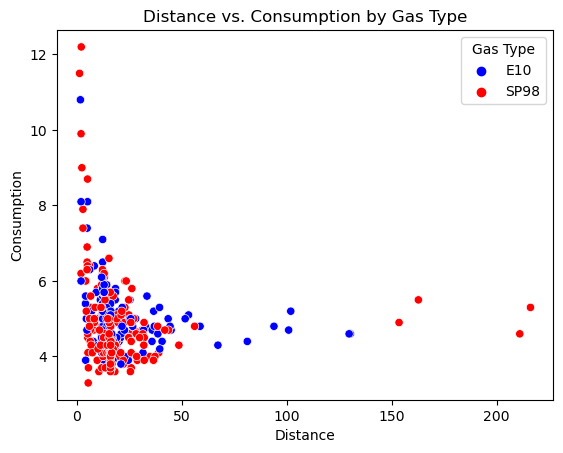

In [28]:
sns.scatterplot(x='distance', y='consume', hue='gas_type', data=df, palette={'E10': 'blue', 'SP98': 'red'})
plt.xlabel('Distance')
plt.ylabel('Consumption')
plt.title('Distance vs. Consumption by Gas Type') 
plt.legend(title='Gas Type')
plt.show()

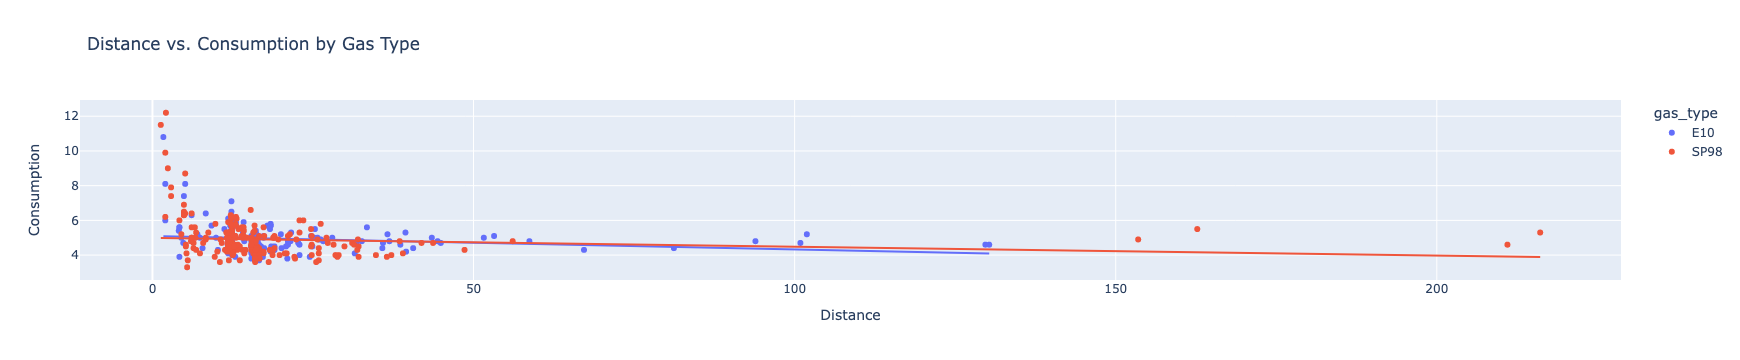

In [29]:
fig = px.scatter(df, x='distance', y='consume', trendline='ols', title= 'Distance vs. Consumption by Gas Type', color="gas_type")
fig.update_layout(xaxis_title='Distance', yaxis_title='Consumption')
plt.show()
fig.show()

In [34]:
plt.figure(figsize=(300, 50))
sns.barplot(x='distance', y='consume', hue='gas_type', data=mean_consumption_by_distance_by_type, palette={'E10': 'blue', 'SP98': 'red'})
plt.xlabel('Distance')
plt.ylabel('Consumption')
plt.title('Mean Consumption by Distance and Gas Type')
plt.legend(title='Gas Type')
plt.show()

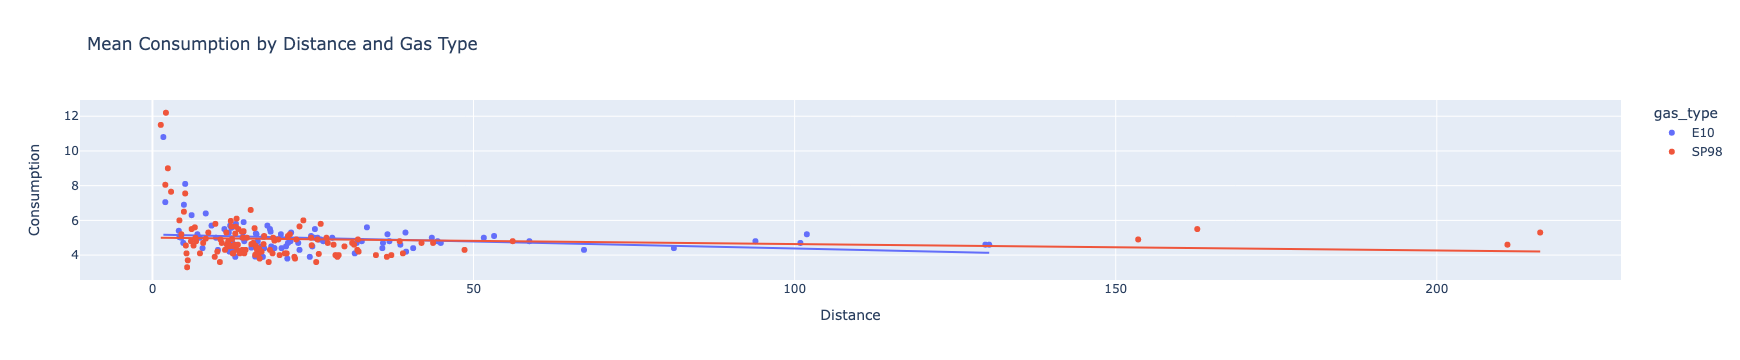

In [35]:
fig = px.scatter(mean_consumption_by_distance_by_type, x='distance', y='consume', trendline='ols', title= 'Mean Consumption by Distance and Gas Type', color="gas_type")
fig.update_layout(xaxis_title='Distance', yaxis_title='Consumption')
plt.show()
fig.show()

### Speed vs Consumption 

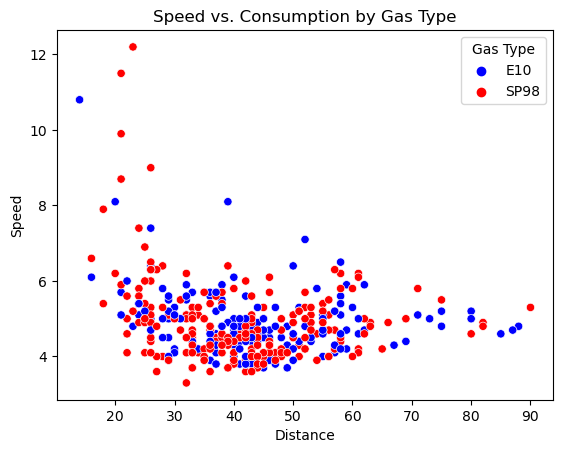

In [30]:
sns.scatterplot(x='speed', y='consume', hue='gas_type', data=df, palette={'E10': 'blue', 'SP98': 'red'})
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.title('Speed vs. Consumption by Gas Type') 
plt.legend(title='Gas Type')
plt.show()

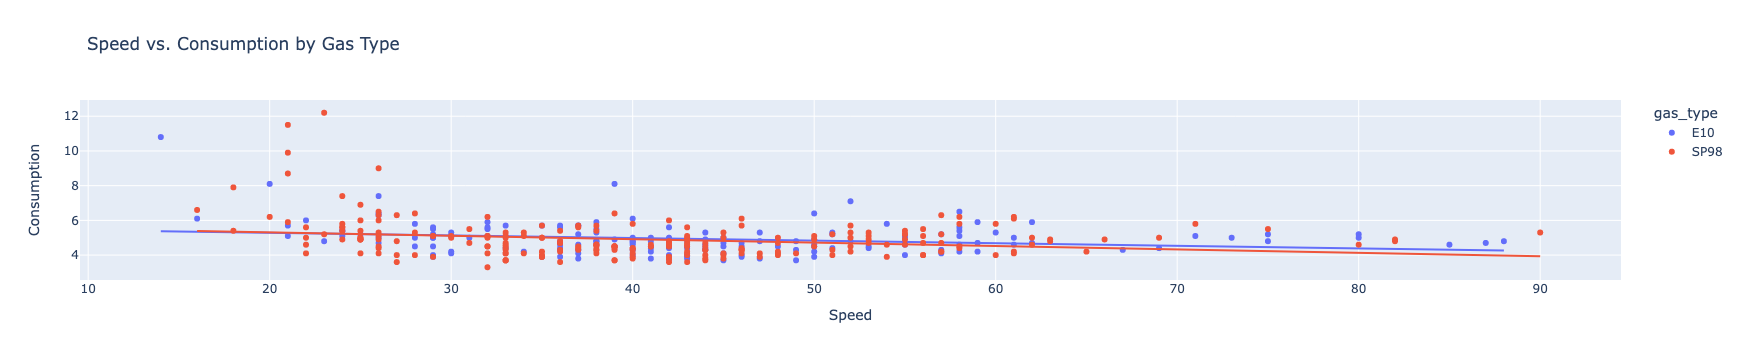

In [31]:
fig = px.scatter(df, x='speed', y='consume', trendline='ols', title= 'Speed vs. Consumption by Gas Type', color="gas_type")
fig.update_layout(xaxis_title='Speed', yaxis_title='Consumption')
plt.show()
fig.show()

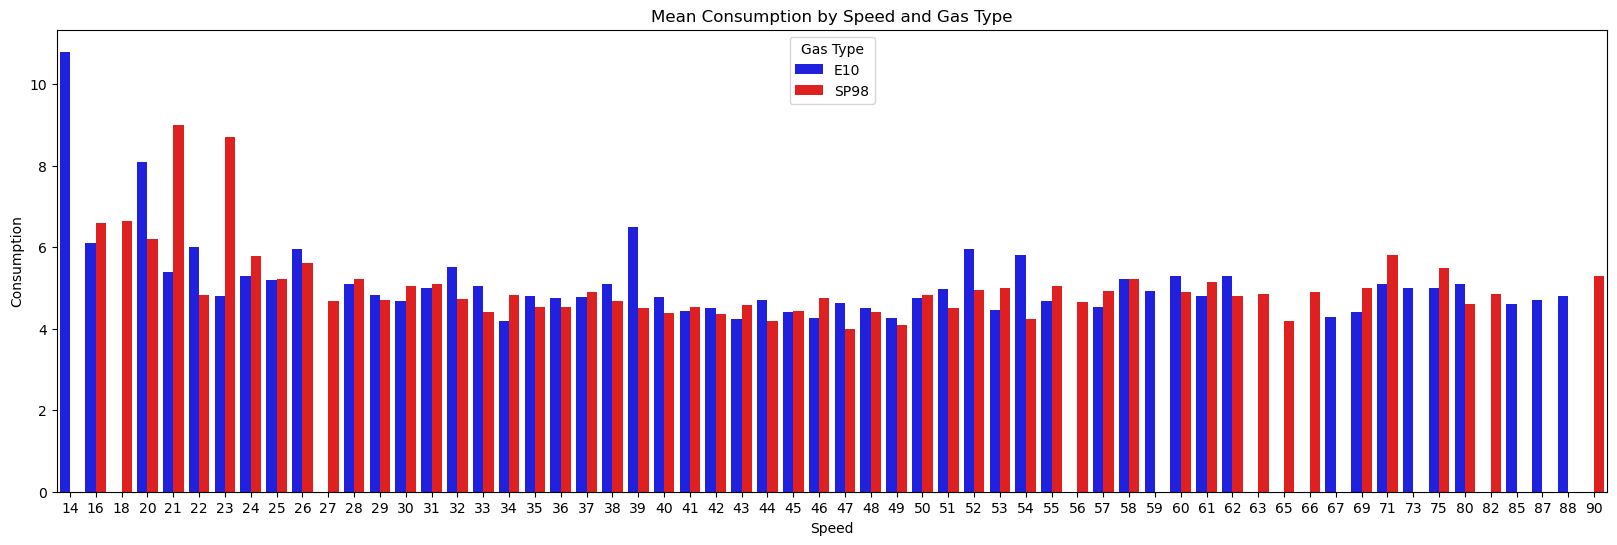

In [32]:
plt.figure(figsize=(20, 6))
sns.barplot(x='speed', y='consume', hue='gas_type', data=mean_consumption_by_speed_by_type, palette={'E10': 'blue', 'SP98': 'red'})
plt.xlabel('Speed')
plt.ylabel('Consumption')
plt.title('Mean Consumption by Speed and Gas Type')
plt.legend(title='Gas Type')
plt.show()

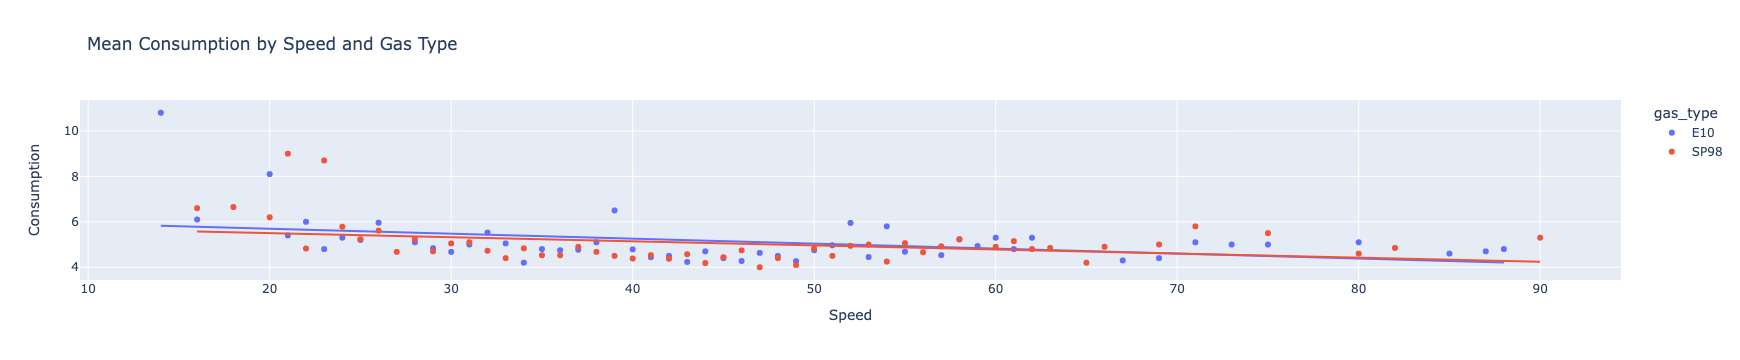

In [33]:
fig = px.scatter(mean_consumption_by_speed_by_type, x='speed', y='consume', trendline='ols', title= 'Mean Consumption by Speed and Gas Type', color="gas_type")
fig.update_layout(xaxis_title='Speed', yaxis_title='Consumption')
plt.show()
fig.show()

### Inside Temperature and Consumption  

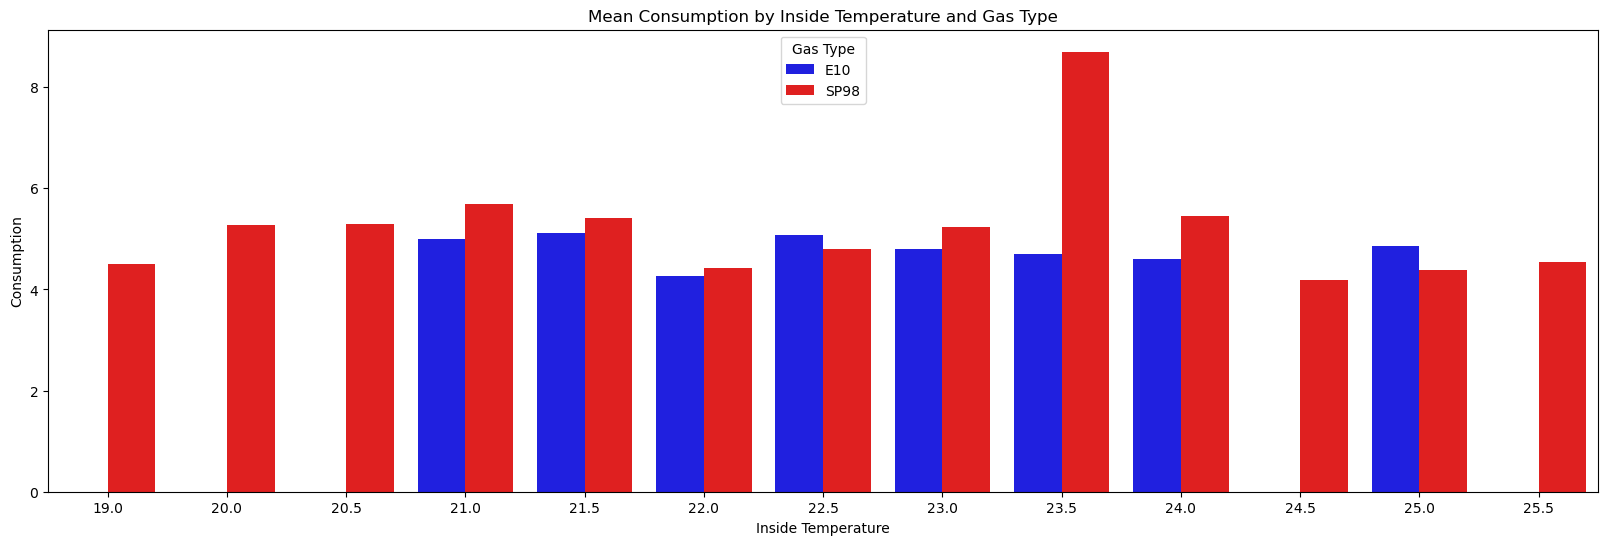

In [36]:
plt.figure(figsize=(20, 6))
sns.barplot(x='temp_inside', y='consume', hue='gas_type', data=mean_consumption_by_temp_inside_by_type, palette={'E10': 'blue', 'SP98': 'red'})
plt.xlabel('Inside Temperature')
plt.ylabel('Consumption')
plt.title('Mean Consumption by Inside Temperature and Gas Type')
plt.legend(title='Gas Type')
plt.show()

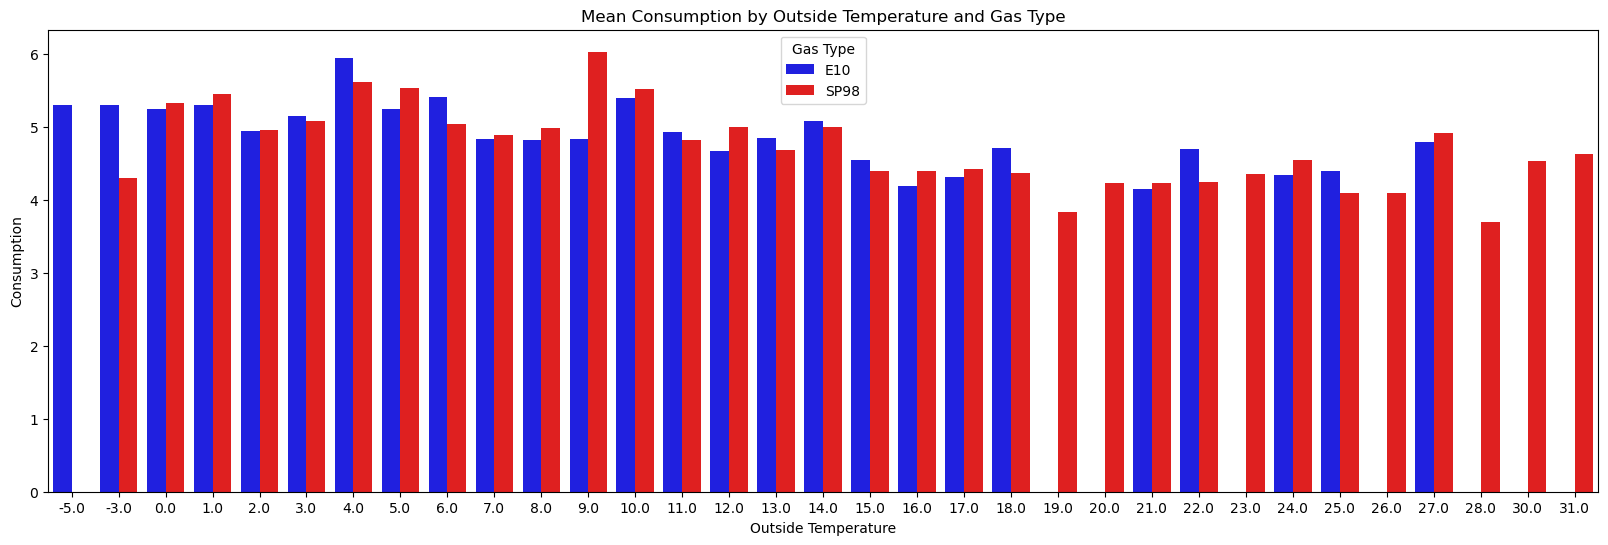

In [37]:
plt.figure(figsize=(20, 6))
sns.barplot(x='temp_outside', y='consume', hue='gas_type', data=mean_consumption_by_temp_outside_by_type, palette={'E10': 'blue', 'SP98': 'red'})
plt.xlabel('Outside Temperature')
plt.ylabel('Consumption')
plt.title('Mean Consumption by Outside Temperature and Gas Type')
plt.legend(title='Gas Type')
plt.show()

## It is hard to discern with full confidence which combustible is superior- across short distances and higher speeds E10 is less efficient and performs worse yet it is hard to say due to the fact that we have considerably more data over short distances for E10 across these features. We should take the next step in our analysis and apply machine learning models to make predictions and to test whether E10 is worse performing or our data is misleading. 

## Making Predictions

### Importing the Required Libraries

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_squared_error, accuracy_score

### OneHotEncoding to Convert Our Categorical Values to Numeric

In [39]:
encoder = OneHotEncoder(sparse_output=False)
encoded_gas_type = encoder.fit_transform(df[['gas_type']])
encoded_gas_type_df = pd.DataFrame(encoded_gas_type, columns=encoder.get_feature_names_out(['gas_type']))

In [40]:
df_encoded = df.drop('gas_type', axis=1)
df_encoded = pd.concat([df_encoded, encoded_gas_type_df], axis=1)

display(df_encoded)

distance  consume  speed  temp_inside  temp_outside  AC  rain  sun  \
0        28.0      5.0     26         21.5          12.0   0     0    0   
1        12.0      4.2     30         21.5          13.0   0     0    0   
2        11.2      5.5     38         21.5          15.0   0     0    0   
3        12.9      3.9     36         21.5          14.0   0     0    0   
4        18.5      4.5     46         21.5          15.0   0     0    0   
..        ...      ...    ...          ...           ...  ..   ...  ...   
383      16.0      3.7     39         24.5          18.0   0     0    0   
384      16.1      4.3     38         25.0          31.0   1     0    0   
385      16.0      3.8     45         25.0          19.0   0     0    0   
386      15.4      4.6     42         25.0          31.0   1     0    0   
387      14.7      5.0     25         25.0          30.0   1     0    0   

     gas_type_E10  gas_type_SP98  
0             1.0            0.0  
1             1.0            0.0  
2             1.0            0.0  
3             1.0            0.0  
4             1.0            0.0  
..            ...            ...  
383           0.0            1.0  
384           0.0            1.0  
385           0.0            1.0  
386           0.0            1.0  
387           0.0            1.0  

[388 rows x 10 columns]

### X-y and Train-Test Splits

In [41]:
X = df_encoded.drop('consume', axis=1)  
y = df_encoded['consume']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling Our Data

In [43]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Linear Regression Model

In [44]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [45]:
y_pred_train = model.predict(X_train_scaled) 
y_pred_test = model.predict(X_test_scaled) 
r2_score_train = r2_score(y_pred_train, y_train)
r2_score_test = r2_score(y_pred_test, y_test)

In [46]:
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print("The r2 of the model for the test set is: {:.3f}".format(r2))
print("The mean absolute error of the model for the test set is: {:.3f}".format(mae))
print("The mean squared error of the model for the test set is: {:.3f}".format(mse))
print("The root mean squared error of the model for the test set is: {:.3f}".format(rmse))

The r2 of the model for the test set is: -0.000
The mean absolute error of the model for the test set is: 0.756
The mean squared error of the model for the test set is: 0.908
The root mean squared error of the model for the test set is: 0.953


In [47]:
r2 = r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)


print("The r2 of the model for the train set is: {:.3f}".format(r2))
print("The mean absolute error of the model for the train set is: {:.3f}".format(mae))
print("The mean squared error of the model for the train set is: {:.3f}".format(mse))
print("The root mean squared error of the model for the train set is: {:.3f}".format(rmse))

The r2 of the model for the train set is: 0.219
The mean absolute error of the model for the train set is: 0.619
The mean squared error of the model for the train set is: 0.862
The root mean squared error of the model for the train set is: 0.928


In [48]:
y_pred_lr = model.predict(X_test_scaled)

In [49]:
predictions = model.predict(X_train_scaled)
model.score(X_train_scaled, y_train)

0.21938207803710108

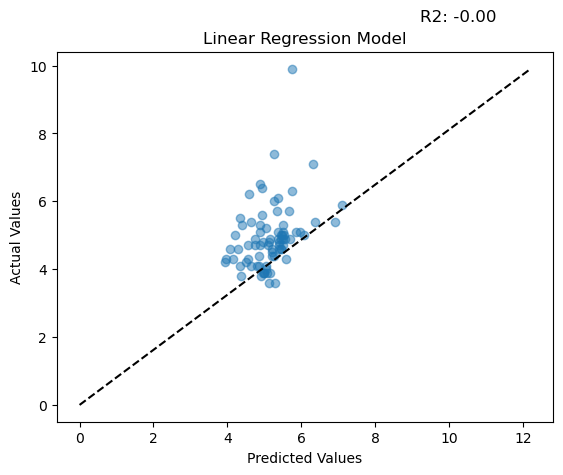

In [50]:
r2 = r2_score(y_test, y_pred_lr)

plt.scatter(y=y_test, x=y_pred_lr, alpha=0.5)

plt.title("Linear Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

plt.plot([0, max(y_train)], [0, max(y_test)], '--k')

plt.text(max(y_test)+0.25*(max(y_pred_lr)-max(y_test)), max(y_test)-0.50*(max(y_pred_lr)-max(y_test)), 'R2: {:.2f}'.format(r2), fontsize=12, color='black')

plt.show()

### Random Forest Regressor Model

In [51]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred_rf)
print("The r2 of the model is: {:.3f}".format(r2))

The r2 of the model is: 0.302


In [52]:
r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print("The r2 of the model for the test set is: {:.3f}".format(r2))
print("The mean absolute error of the model for the test set is: {:.3f}".format(mae))
print("The mean squared error of the model for the test set is: {:.3f}".format(mse))
print("The root mean squared error of the model for the test set is: {:.3f}".format(rmse))

The r2 of the model for the test set is: 0.302
The mean absolute error of the model for the test set is: 0.548
The mean squared error of the model for the test set is: 0.633
The root mean squared error of the model for the test set is: 0.796


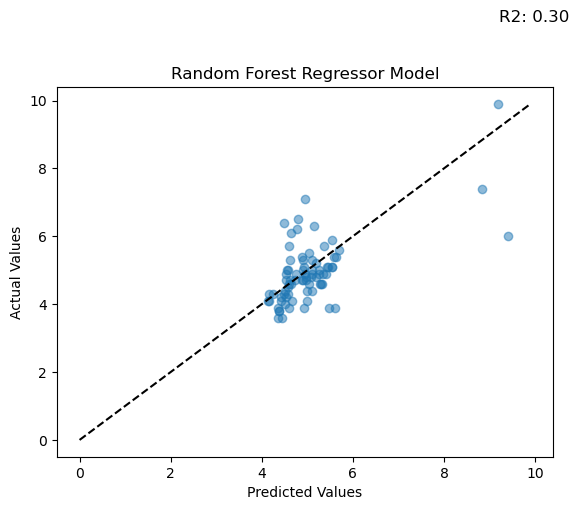

In [53]:
r2 = r2_score(y_test, y_pred_rf)

plt.scatter(y=y_test, x=y_pred_rf, alpha=0.5)

plt.title("Random Forest Regressor Model")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

plt.plot([0, max(y_test)], [0, max(y_test)], '--k')

plt.text(max(y_test)+0.25*(max(y_pred_rf)-max(y_train)), max(y_train)-0.25*(max(y_pred_rf)-max(y_test)), 'R2: {:.2f}'.format(r2), fontsize=12, color='black')

plt.show()

### Gradient Boosting Regressor Model

In [54]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

gb_model.fit(X_train_scaled, y_train)

y_pred_gb = gb_model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred_gb)
print("The r2 of the model is: {:.3f}".format(r2))

The r2 of the model is: 0.131


In [55]:
r2 = r2_score(y_test, y_pred_gb)
mae = mean_absolute_error(y_test, y_pred_gb)
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)

print("The r2 of the model for the test set is: {:.3f}".format(r2))
print("The mean absolute error of the model for the test set is: {:.3f}".format(mae))
print("The mean squared error of the model for the test set is: {:.3f}".format(mse))
print("The root mean squared error of the model for the test set is: {:.3f}".format(rmse))

The r2 of the model for the test set is: 0.131
The mean absolute error of the model for the test set is: 0.628
The mean squared error of the model for the test set is: 0.788
The root mean squared error of the model for the test set is: 0.888


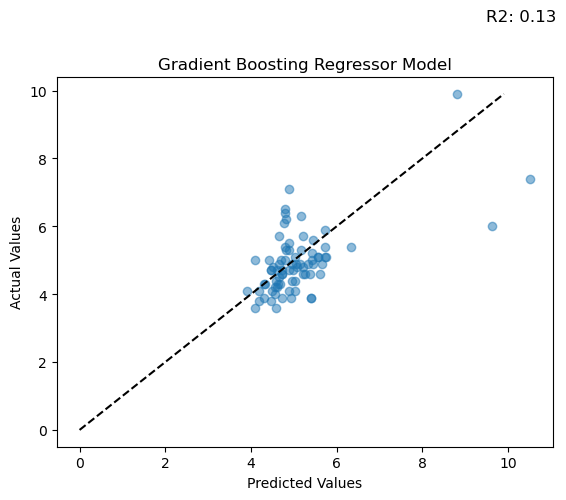

In [56]:
r2 = r2_score(y_test, y_pred_gb)

plt.scatter(y=y_test, x=y_pred_gb, alpha=0.5)

plt.title("Gradient Boosting Regressor Model")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

plt.plot([0, max(y_test)], [0, max(y_test)], '--k')

plt.text(max(y_test)+0.25*(max(y_pred_gb)-max(y_train)), max(y_train)-0.25*(max(y_pred_gb)-max(y_test)), 'R2: {:.2f}'.format(r2), fontsize=12, color='black')

plt.show()

### Regularization- L1 (Lasso) & L2 (Ridge) 

In [73]:
from sklearn.linear_model import Lasso 

lasso = Lasso(alpha=0.1)

lasso.fit(X_train_scaled, y_train) 

y_pred = lasso.predict(X_test_scaled) 

print("The r2 of the model is:", lasso.score(X_test_scaled, y_test))

The r2 of the model is: -0.0006687179470548088


In [72]:
from sklearn.linear_model import Ridge 

ridge = Ridge(alpha=0.1) 

ridge.fit(X_train_scaled, y_train) 

y_pred = ridge.predict(X_test_scaled)

print("The r2 of the model is:", ridge.score(X_test_scaled, y_test))

The r2 of the model is: 0.020907879220835923


## All of our above models have performed horrifically. We shall apply techniques of Feature Selection and Engineering to see if we can improve model performance

### Feature Selection

In [57]:
df_encoded.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC',
       'rain', 'sun', 'gas_type_E10', 'gas_type_SP98'],
      dtype='object')

In [58]:
X_fs = df_encoded.drop(['consume', 'rain', 'sun', 'temp_outside'], axis=1)  
y_fs = df_encoded['consume']

In [59]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
scaler = MinMaxScaler()
X_train_scaled_fs = scaler.fit_transform(X_train_fs)
X_test_scaled_fs = scaler.fit_transform(X_test_fs)

### Feature Selection Linear Regression Model

In [61]:
model = LinearRegression()
model.fit(X_train_scaled_fs, y_train_fs)

LinearRegression()

In [62]:
y_pred_train_fs = model.predict(X_train_scaled_fs) 
y_pred_test_fs = model.predict(X_test_scaled_fs) 
r2_score_train_fs = r2_score(y_pred_train_fs, y_train_fs)
r2_score_test_fs = r2_score(y_pred_test_fs, y_test_fs)

In [63]:
r2 = r2_score(y_test_fs, y_pred_test_fs)
mae = mean_absolute_error(y_test_fs, y_pred_test_fs)
mse = mean_squared_error(y_test_fs, y_pred_test_fs)
rmse = np.sqrt(mse)

print("The r2 of the model for the test set is: {:.3f}".format(r2))
print("The mean absolute error of the model for the test set is: {:.3f}".format(mae))
print("The mean squared error of the model for the test set is: {:.3f}".format(mse))
print("The root mean squared error of the model for the test set is: {:.3f}".format(rmse))

The r2 of the model for the test set is: -0.000
The mean absolute error of the model for the test set is: 0.756
The mean squared error of the model for the test set is: 0.908
The root mean squared error of the model for the test set is: 0.953


In [64]:
r2 = r2_score(y_train_fs, y_pred_train_fs)
mae = mean_absolute_error(y_train_fs, y_pred_train_fs)
mse = mean_squared_error(y_train_fs, y_pred_train_fs)
rmse = np.sqrt(mse)


print("The r2 of the model for the train set is: {:.3f}".format(r2))
print("The mean absolute error of the model for the train set is: {:.3f}".format(mae))
print("The mean squared error of the model for the train set is: {:.3f}".format(mse))
print("The root mean squared error of the model for the train set is: {:.3f}".format(rmse))

The r2 of the model for the train set is: 0.219
The mean absolute error of the model for the train set is: 0.619
The mean squared error of the model for the train set is: 0.862
The root mean squared error of the model for the train set is: 0.928


In [65]:
y_pred_lr_fs = model.predict(X_test_scaled_fs)

In [66]:
predictions = model.predict(X_train_scaled_fs)
model.score(X_train_scaled_fs, y_train_fs)

0.21938207803710108

### Feature Selection Random Forest Regressor

In [67]:
rf_model_fs = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model_fs.fit(X_train_scaled_fs, y_train_fs)

y_pred_rf_fs = rf_model_fs.predict(X_test_scaled_fs)

r2 = r2_score(y_test_fs, y_pred_rf_fs)
print("The r2 of the model is: {:.3f}".format(r2))

The r2 of the model is: 0.302


In [68]:
r2 = r2_score(y_test_fs, y_pred_rf_fs)
mae = mean_absolute_error(y_test_fs, y_pred_rf_fs)
mse = mean_squared_error(y_test_fs, y_pred_rf_fs)
rmse = np.sqrt(mse)

print("The r2 of the model for the test set is: {:.3f}".format(r2))
print("The mean absolute error of the model for the test set is: {:.3f}".format(mae))
print("The mean squared error of the model for the test set is: {:.3f}".format(mse))
print("The root mean squared error of the model for the test set is: {:.3f}".format(rmse))

The r2 of the model for the test set is: 0.302
The mean absolute error of the model for the test set is: 0.548
The mean squared error of the model for the test set is: 0.633
The root mean squared error of the model for the test set is: 0.796


### Feature Selection Gradient Boosting Regressor

In [69]:
gb_model_fs = GradientBoostingRegressor(n_estimators=100, random_state=42)

gb_model_fs.fit(X_train_scaled_fs, y_train_fs)

y_pred_gb_fs = gb_model_fs.predict(X_test_scaled_fs)

r2 = r2_score(y_test_fs, y_pred_gb_fs)
print("The r2 of the model is: {:.3f}".format(r2))

The r2 of the model is: 0.131


In [70]:
r2 = r2_score(y_test_fs, y_pred_gb_fs)
mae = mean_absolute_error(y_test_fs, y_pred_gb_fs)
mse = mean_squared_error(y_test_fs, y_pred_gb_fs)
rmse = np.sqrt(mse)

print("The r2 of the model for the test set is: {:.3f}".format(r2))
print("The mean absolute error of the model for the test set is: {:.3f}".format(mae))
print("The mean squared error of the model for the test set is: {:.3f}".format(mse))
print("The root mean squared error of the model for the test set is: {:.3f}".format(rmse))

The r2 of the model for the test set is: 0.131
The mean absolute error of the model for the test set is: 0.628
The mean squared error of the model for the test set is: 0.788
The root mean squared error of the model for the test set is: 0.888


## Our models still perform terribly despite removing auxiliary columns such as "sun" or "rain"- we will now turn to feature engineering, the creation of new features to transform our existing data to better capture the relationships and hopefully improve model performance

### Feature Engineering 

In [74]:
df_feature_engineering = df_encoded.copy() 

In [75]:
df_feature_engineering.drop(['AC', 'rain', 'sun', 'temp_outside'], axis=1)  

distance  consume  speed  temp_inside  gas_type_E10  gas_type_SP98
0        28.0      5.0     26         21.5           1.0            0.0
1        12.0      4.2     30         21.5           1.0            0.0
2        11.2      5.5     38         21.5           1.0            0.0
3        12.9      3.9     36         21.5           1.0            0.0
4        18.5      4.5     46         21.5           1.0            0.0
..        ...      ...    ...          ...           ...            ...
383      16.0      3.7     39         24.5           0.0            1.0
384      16.1      4.3     38         25.0           0.0            1.0
385      16.0      3.8     45         25.0           0.0            1.0
386      15.4      4.6     42         25.0           0.0            1.0
387      14.7      5.0     25         25.0           0.0            1.0

[388 rows x 6 columns]

In [77]:
df_feature_engineering['consumption_by_distance'] = (df_feature_engineering['consume']/df_feature_engineering['distance']).round(3)
df_feature_engineering['consumption_by_speed'] = (df_feature_engineering['consume']/df_feature_engineering['speed']).round(3)
df_feature_engineering['consumption_by_temp_inside'] = (df_feature_engineering['consume']/df_feature_engineering['temp_inside']).round(3)

df_feature_engineering

distance  consume  speed  temp_inside  temp_outside  AC  rain  sun  \
0        28.0      5.0     26         21.5          12.0   0     0    0   
1        12.0      4.2     30         21.5          13.0   0     0    0   
2        11.2      5.5     38         21.5          15.0   0     0    0   
3        12.9      3.9     36         21.5          14.0   0     0    0   
4        18.5      4.5     46         21.5          15.0   0     0    0   
..        ...      ...    ...          ...           ...  ..   ...  ...   
383      16.0      3.7     39         24.5          18.0   0     0    0   
384      16.1      4.3     38         25.0          31.0   1     0    0   
385      16.0      3.8     45         25.0          19.0   0     0    0   
386      15.4      4.6     42         25.0          31.0   1     0    0   
387      14.7      5.0     25         25.0          30.0   1     0    0   

     gas_type_E10  gas_type_SP98  consumption_by_distance  \
0             1.0            0.0                    0.179   
1             1.0            0.0                    0.350   
2             1.0            0.0                    0.491   
3             1.0            0.0                    0.302   
4             1.0            0.0                    0.243   
..            ...            ...                      ...   
383           0.0            1.0                    0.231   
384           0.0            1.0                    0.267   
385           0.0            1.0                    0.238   
386           0.0            1.0                    0.299   
387           0.0            1.0                    0.340   

     consumption_by_speed  consumption_by_temp_inside  
0                   0.192                       0.233  
1                   0.140                       0.195  
2                   0.145                       0.256  
3                   0.108                       0.181  
4                   0.098                       0.209  
..                    ...                         ...  
383                 0.095                       0.151  
384                 0.113                       0.172  
385                 0.084                       0.152  
386                 0.110                       0.184  
387                 0.200                       0.200  

[388 rows x 13 columns]

In [80]:
df_feature_engineering = df_feature_engineering.drop(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun', 'temp_outside'], axis=1)  

In [81]:
df_feature_engineering.columns

Index(['consume', 'gas_type_E10', 'gas_type_SP98', 'consumption_by_distance',
       'consumption_by_speed', 'consumption_by_temp_inside'],
      dtype='object')

In [82]:
new_cols = ['gas_type_E10', 'gas_type_SP98', 'consumption_by_distance',
       'consumption_by_speed', 'consumption_by_temp_inside', 'consume']

df_feature_engineering = df_feature_engineering.reindex(columns=new_cols)

df_feature_engineering.head()

gas_type_E10  gas_type_SP98  consumption_by_distance  consumption_by_speed  \
0           1.0            0.0                    0.179                 0.192   
1           1.0            0.0                    0.350                 0.140   
2           1.0            0.0                    0.491                 0.145   
3           1.0            0.0                    0.302                 0.108   
4           1.0            0.0                    0.243                 0.098   

   consumption_by_temp_inside  consume  
0                       0.233      5.0  
1                       0.195      4.2  
2                       0.256      5.5  
3                       0.181      3.9  
4                       0.209      4.5

In [83]:
X_fe = df_feature_engineering.drop(['consume'], axis=1)  
y_fe = df_feature_engineering['consume'] 

In [84]:
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.3, random_state=42)

In [85]:
scaler = MinMaxScaler()
scaler.fit(X_train_fe)

X_train_fe_scaled = scaler.transform(X_train_fe)
X_test_fe_scaled  = scaler.transform(X_test_fe)

X_train_fe_final_scaled = pd.DataFrame(X_train_fe_scaled, columns =X_train_fe.columns)
X_test_fe_final_scaled = pd.DataFrame(X_test_fe_scaled, columns =X_test_fe.columns)

### Feature Engineering Linear Regression Model

In [87]:
model_fe = LinearRegression()
model_fe.fit(X_train_fe_final_scaled, y_train_fe)

LinearRegression()

In [93]:
y_pred_train_fe = model_fe.predict(X_train_fe_final_scaled) 
y_pred_test_fe = model_fe.predict(X_test_fe_final_scaled) 
r2_score_train_fe = r2_score(y_pred_train_fe, y_train_fe)
r2_score_test_fe = r2_score(y_pred_test_fe, y_test_fe)

In [94]:
r2 = r2_score(y_test_fe, y_pred_test_fe)
mae = mean_absolute_error(y_test_fe, y_pred_test_fe)
mse = mean_squared_error(y_test_fe, y_pred_test_fe)
rmse = np.sqrt(mse)

print("The r2 of the model for the test set is: {:.3f}".format(r2))
print("The mean absolute error of the model for the test set is: {:.3f}".format(mae))
print("The mean squared error of the model for the test set is: {:.3f}".format(mse))
print("The root mean squared error of the model for the test set is: {:.3f}".format(rmse))

The r2 of the model for the test set is: 0.946
The mean absolute error of the model for the test set is: 0.151
The mean squared error of the model for the test set is: 0.046
The root mean squared error of the model for the test set is: 0.213


In [95]:
r2 = r2_score(y_train_fe, y_pred_train_fe)
mae = mean_absolute_error(y_train_fe, y_pred_train_fe)
mse = mean_squared_error(y_train_fe, y_pred_train_fe)
rmse = np.sqrt(mse)


print("The r2 of the model for the train set is: {:.3f}".format(r2))
print("The mean absolute error of the model for the train set is: {:.3f}".format(mae))
print("The mean squared error of the model for the train set is: {:.3f}".format(mse))
print("The root mean squared error of the model for the train set is: {:.3f}".format(rmse))

The r2 of the model for the train set is: 0.970
The mean absolute error of the model for the train set is: 0.137
The mean squared error of the model for the train set is: 0.035
The root mean squared error of the model for the train set is: 0.188


In [97]:
y_pred_lr_fe = model_fe.predict(X_test_fe_final_scaled)

In [98]:
predictions = model_fe.predict(X_train_fe_final_scaled)
model_fe.score(X_train_fe_final_scaled, y_train_fe)

0.9697007699950139

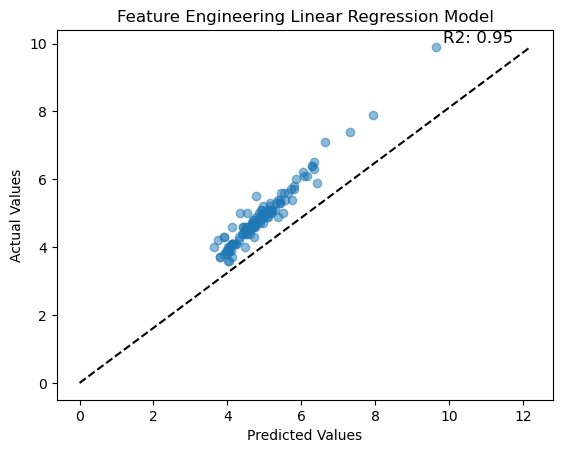

In [105]:
r2 = r2_score(y_test_fe, y_pred_lr_fe)

plt.scatter(y=y_test_fe, x=y_pred_lr_fe, alpha=0.5)

plt.title("Feature Engineering Linear Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

plt.plot([0, max(y_train_fe)], [0, max(y_test_fe)], '--k')

plt.text(max(y_test_fe)+0.25*(max(y_pred_lr_fe)-max(y_test_fe)), max(y_test_fe)-0.50*(max(y_pred_lr_fe)-max(y_test_fe)), 'R2: {:.2f}'.format(r2), fontsize=12, color='black')

plt.show()

### Feature Engineering Random Forest Regressor

In [101]:
rf_model_fe = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model_fe.fit(X_train_fe_final_scaled, y_train_fe)

y_pred_rf_fe = rf_model_fe.predict(X_test_fe_final_scaled)

r2 = r2_score(y_test_fe, y_pred_rf_fe)
print("The r2 of the model is: {:.3f}".format(r2))

The r2 of the model is: 0.933


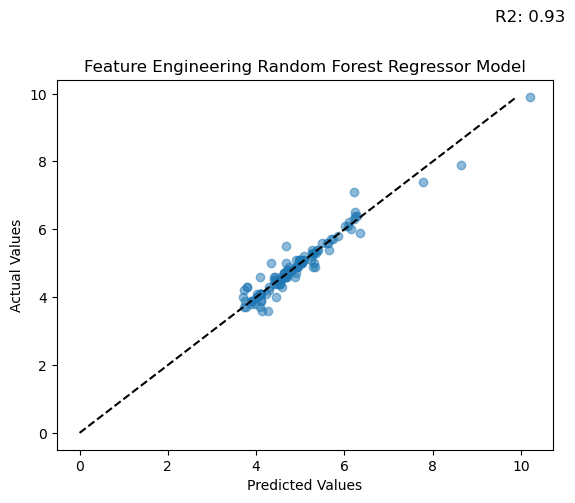

In [106]:
r2 = r2_score(y_test_fe, y_pred_rf_fe)

plt.scatter(y=y_test_fe, x=y_pred_rf_fe, alpha=0.5)

plt.title("Feature Engineering Random Forest Regressor Model")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

plt.plot([0, max(y_test_fe)], [0, max(y_test_fe)], '--k')

plt.text(max(y_test_fe)+0.25*(max(y_pred_rf_fe)-max(y_train_fe)), max(y_train_fe)-0.25*(max(y_pred_rf_fe)-max(y_test_fe)), 'R2: {:.2f}'.format(r2), fontsize=12, color='black')

plt.show()

### Feature Engineering Gradient Boosting Regressor

In [102]:
gb_model_fe = GradientBoostingRegressor(n_estimators=100, random_state=42)

gb_model_fe.fit(X_train_fe_final_scaled, y_train_fe)

y_pred_gb_fe = gb_model_fe.predict(X_test_fe_final_scaled)

r2 = r2_score(y_test_fe, y_pred_gb_fe)
print("The r2 of the model is: {:.3f}".format(r2))

The r2 of the model is: 0.931


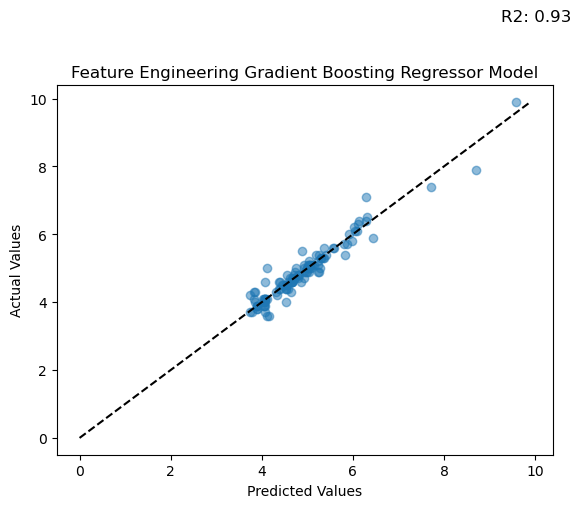

In [107]:
r2 = r2_score(y_test_fe, y_pred_gb_fe)

plt.scatter(y=y_test_fe, x=y_pred_gb_fe, alpha=0.5)

plt.title("Feature Engineering Gradient Boosting Regressor Model")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

plt.plot([0, max(y_test_fe)], [0, max(y_test_fe)], '--k')

plt.text(max(y_test_fe)+0.25*(max(y_pred_gb_fe)-max(y_train_fe)), max(y_train_fe)-0.25*(max(y_pred_gb_fe)-max(y_test_fe)), 'R2: {:.2f}'.format(r2), fontsize=12, color='black')

plt.show()